In [57]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",50)

In [2]:
df = pd.read_excel('http://www.tos.ohio.gov/Documents/Transparency/2013%20-%202014%20School%20Year%20Staff%20Salary%20Information.xlsx',
                  sheetname='Data tab')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272731 entries, 0 to 272730
Data columns (total 10 columns):
LAST NAME               272710 non-null object
FIRST NAME              272645 non-null object
EDUCATION LEVEL         272731 non-null object
JOB DESCRIPTION         272731 non-null object
DISTRICT NAME           272638 non-null object
SCHOOL NAME             261393 non-null object
CITY NAME               261360 non-null object
DAYS WORKED             272731 non-null int64
HOURS WORKED PER DAY    272731 non-null float64
PAY AMOUNT              272731 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 22.9+ MB


In [5]:
df.head()

,LAST NAME,FIRST NAME,EDUCATION LEVEL,JOB DESCRIPTION,DISTRICT NAME,SCHOOL NAME,CITY NAME,DAYS WORKED,HOURS WORKED PER DAY,PAY AMOUNT
0,LONGDEN,CHERYL,Masters,Tutor/Small Group Instructor Assignment (Serve...,Ashtabula Area City,Lakeside High School,Ashtabula,185,7.00,23544
1,SIKES,LINDA,Masters,Counseling Assignment,Yellow Springs Exempted Village,Yellow Springs/McKinney High School,Yellow Springs,194,7.00,80949
2,SMITH,SHERRY,Masters,Other Professional  Other Assignment,Greene County ESC,Greene County ESC,Yellow Springs,103,7.50,24322
3,BALOG,GEORGE,Masters,Teacher Assignment,Dayton City,Stivers School For The Arts,Dayton,200,4.35,36964
4,BAUER,RICHARD,Masters,Teacher Assignment,North Olmsted City,North Olmsted Middle School,North Olmsted,185,7.50,91187


In [16]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272731 entries, 0 to 272730
Data columns (total 10 columns):
LAST_NAME               272710 non-null object
FIRST_NAME              272645 non-null object
EDUCATION_LEVEL         272731 non-null object
JOB_DESCRIPTION         272731 non-null object
DISTRICT_NAME           272638 non-null object
SCHOOL_NAME             261393 non-null object
CITY_NAME               261360 non-null object
DAYS_WORKED             272731 non-null int64
HOURS_WORKED_PER_DAY    272731 non-null float64
PAY_AMOUNT              272731 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 22.9+ MB


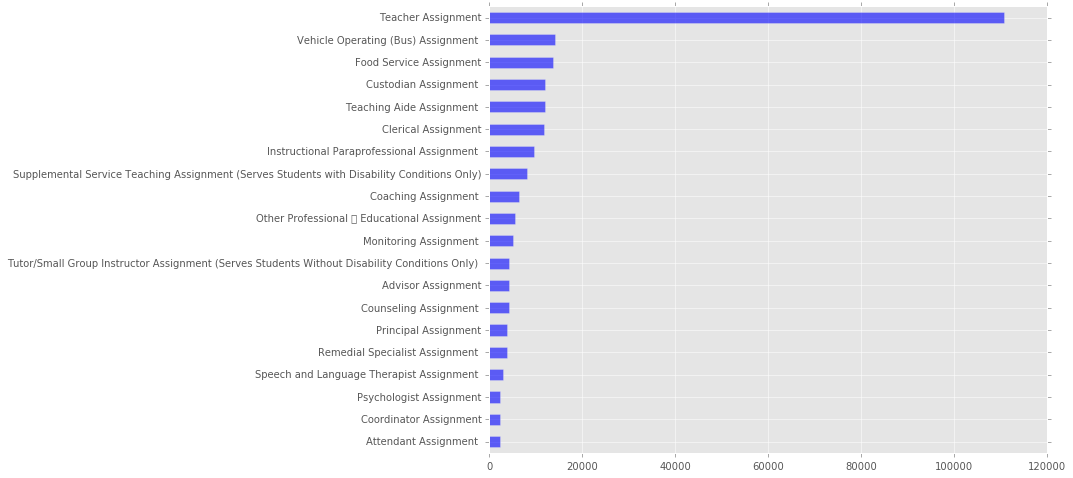

In [44]:
df.JOB_DESCRIPTION.value_counts().sort_values(ascending=False)[:20].sort_values().plot.barh(alpha=0.6)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

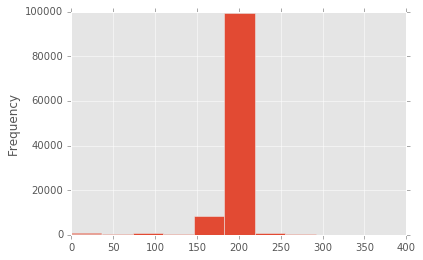

In [45]:
df.query("JOB_DESCRIPTION == 'Teacher Assignment'").DAYS_WORKED.plot.hist()
plt.show()

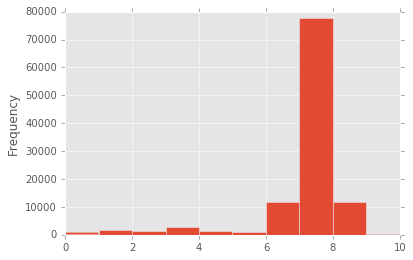

In [48]:
df.query("JOB_DESCRIPTION == 'Teacher Assignment'").HOURS_WORKED_PER_DAY.plot.hist()
plt.show()

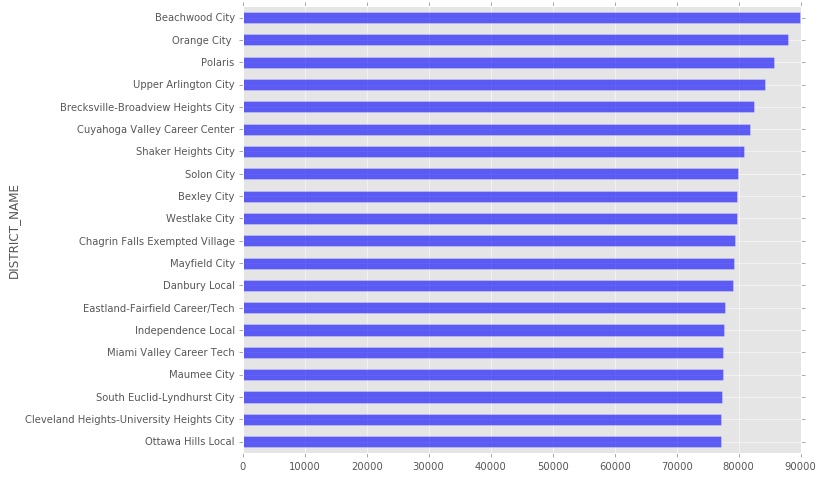

In [72]:
# Criteria for "full time" teachers
qry = """
JOB_DESCRIPTION == 'Teacher Assignment' \
& HOURS_WORKED_PER_DAY >= 6 \
& DAYS_WORKED > 180
"""

pd.pivot_table(df.query(qry), index='DISTRICT_NAME', values='PAY_AMOUNT', 
               aggfunc='median').sort_values(ascending=False)[:20].sort_values().plot.barh(alpha=0.6)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [70]:
by_count = pd.pivot_table(df.query(qry), index='DISTRICT_NAME', values='PAY_AMOUNT', 
               aggfunc='count')
by_count

DISTRICT_NAME
A+ Arts Academy                                          13
A+ Children's Academy                                     7
Academy for Urban Scholars Youngstown                     4
Academy of Arts and Sciences                             13
Academy of Educational Excellence                         5
Accelerated Achievement Academy of Cincinnati             6
Accelerated Achievement Academy of North Cincinnati       6
Achieve Career Preparatory Academy                       11
Ada Exempted Village                                     51
Adams County/Ohio Valley Local                          219
Adena Local                                              54
Akron City                                             1379
Akron Digital Academy                                    22
Akron Preparatory School                                 10
Akros Middle School                                      14
Alexander Local                                          93
Allen County ESC          

In [73]:
by_median = pd.pivot_table(df.query(qry), index='DISTRICT_NAME', values='PAY_AMOUNT', 
               aggfunc='median')
by_median

DISTRICT_NAME
A+ Arts Academy                                        35453.0
A+ Children's Academy                                  28274.0
Academy for Urban Scholars Youngstown                  33000.0
Academy of Arts and Sciences                           32000.0
Academy of Educational Excellence                      30000.0
Accelerated Achievement Academy of Cincinnati          37500.0
Accelerated Achievement Academy of North Cincinnati    38685.0
Achieve Career Preparatory Academy                     30000.0
Ada Exempted Village                                   55755.0
Adams County/Ohio Valley Local                         52196.0
Adena Local                                            56517.0
Akron City                                             65219.0
Akron Digital Academy                                  40236.0
Akron Preparatory School                               30000.0
Akros Middle School                                    33500.0
Alexander Local                          

In [86]:
pd.concat([by_count, by_median], axis=1, keys=['count','median']).sort_values(by='median', ascending=False)

,count,median
DISTRICT_NAME,,
Beachwood City,122,89838.000
Orange City,156,87939.000
Polaris,45,85703.000
Upper Arlington City,318,84290.000
Brecksville-Broadview Heights City,196,82548.000
Cuyahoga Valley Career Center,38,81862.500
Shaker Heights City,327,80934.000
Solon City,257,79895.000
Bexley City,121,79712.000
